In [105]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import os
import matplotlib.gridspec as gridspec
import copy

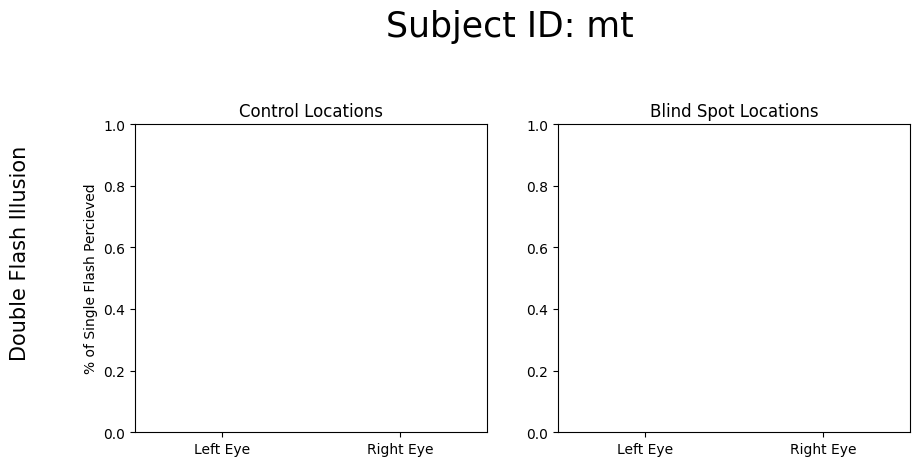

In [120]:
subject_id = "mt"
data = "Single" #illusory, single, double

def file_handle(subject_id):
  files = os.listdir()
  for file in files:
    if subject_id in file and "bdf_L" in file:
      bdf_L_f = file
    if subject_id in file and "bdf_R" in file:
      bdf_R_f = file

  with open(bdf_L_f, 'r') as json_file:
    bdf_L = json.load(json_file)

  with open(bdf_R_f, 'r') as json_file:
    bdf_R = json.load(json_file)

  return bdf_L, bdf_R

bdf_L, bdf_R = file_handle(subject_id)

fig, ax = plt.subplots(1,2,figsize = (10,4))
gs = gridspec.GridSpec(1, 2, figure=fig, hspace= 0.4)
fig.text(0.5, 1.1, f'Subject ID: {subject_id}', fontsize=25, ha='center')
fig.text(0, 0.3 , 'Double Flash Illusion', fontsize=15, ha='left', rotation = 'vertical')

dt_Lpos = bdf_L["Present"]
dt_Rpos = bdf_R["Present"]
countcontrol= []
countblind = []
if data == "Single":
  countcontrol.append(dt_Lpos['1']['onep'])
  countcontrol.append(dt_Rpos['0']['onep'])
  countblind.append(dt_Lpos['0']['onep'])
  countblind.append(dt_Rpos['1']['onep'])
  ylab = '% of Single Flash Percieved'
elif data == "Double":
  countcontrol.append(dt_Lpos['1']['twop'])
  countcontrol.append(dt_Rpos['0']['twop'])
  countblind.append(dt_Lpos['0']['twop'])
  countblind.append(dt_Rpos['1']['twop'])
  ylab = '% of Double Flashes Percieved'
else:
  countcontrol.append(dt_Lpos['1']['twop'] + dt_Lpos['1']['threep'])
  countcontrol.append(dt_Rpos['0']['twop'] + dt_Rpos['0']['threep'] )
  countblind.append(dt_Lpos['0']['twop'] + dt_Lpos['0']['threep'])
  countblind.append(dt_Rpos['1']['twop'] + dt_Rpos['1']['threep'])
  ylab = '% of Illusory Flashes Percieved'


# Control
fruits = ['Left Eye', 'Right Eye']
counts = countcontrol
bar_colors = ['tab:red', 'tab:red']
ax[0].bar(fruits, counts, color=bar_colors)
ax[0].set_ylabel(ylab)
ax[0].set_title('Control Locations')
ax[0].set_ylim(0,1)

#Blind
fruits2 = ['Left Eye', 'Right Eye']
counts2 = countblind
bar_colors2 = ['tab:blue', 'tab:blue']
ax[1].bar(fruits2, counts2, color=bar_colors2)
ax[1].set_title('Blind Spot Locations')
ax[1].set_ylim(0,1)

plt.show()

fig.savefig(f'bar_raw_{subject_id}_{data}.png', bbox_inches='tight', dpi=300)